In [43]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_iris, load_boston  # 0.19
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,\
                                    learning_curve, validation_curve
import matplotlib.pyplot as plt
%matplotlib inline

from tool import *

In [36]:
# 线性回归, 岭回归, Lasso回归
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeClassifier
from sklearn.linear_model import Lasso, LassoLars, LassoLarsIC
# Logistic回归
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# KNN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, KDTree
# 朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB
# 支持向量机
from sklearn.svm import SVR, SVC
# 树模型
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
# 随机森林
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, RandomTreesEmbedding
# boosting分类
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
# Bagging分类
from sklearn.ensemble import BaggingClassifier
# adaboost分类
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

# 建模

## 分类

In [37]:
xdata, ydata = get_dataset_adultTest()[1:3]
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.30, random_state=24) # 训练集&测试集

In [38]:
# %%time
model = AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
y_scores = model.predict_proba(X_test)[:,1]  # 用于ROC曲线的
# y_scores = model.decision_function(X_test)

### 分类评估指标

[python + sklearn ︱分类效果评估——acc、recall、F1、ROC、回归、距离](https://www.cnblogs.com/damumu/p/7320345.html)

[谈谈评价指标中的宏平均和微平均](http://www.cnblogs.com/robert-dlut/p/5276927.html)

[一文让你彻底记住什么是ROC/AUC](https://mp.weixin.qq.com/s/zeOviV1rjcSSwk79FznnNA)

In [39]:
metrics_Classifier(model, X_test, y_test, y_pred, y_scores)

自带评分:0.8590439144231754
-------------------------
准确率:0.8590439144231754
召回率:0.6194653299916458
F1评分:0.6829380612479854
ROC/AUC:0.9146904266315505
kappa评分:0.5935358425476028
-------------------------
混淆矩阵
[[6909  466]
 [ 911 1483]]
-------------------------
分类报告
             precision    recall  f1-score   support

        0.0       0.88      0.94      0.91      7375
        1.0       0.76      0.62      0.68      2394

avg / total       0.85      0.86      0.85      9769



### ROC曲线

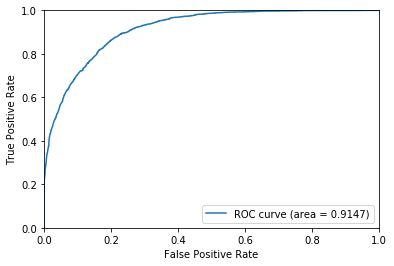

In [40]:
plot_roc(y_test, y_scores)

[sklearn计算ROC曲线下面积AUC](https://www.jianshu.com/p/90106243d231)
[sklearn.metrics.roc_curve解析](https://blog.csdn.net/u014264373/article/details/80487766)

* 关于ROC曲线
  1. 虚线所示直线随机分类时的ROC曲线，一般画到图中作为参照点
  2. 对于一个完美的分类器，ROC曲线应该是从(0,0)到(0,1)，然后横着连到(1,1)的折线
  3. ROC曲线越接近左上角，分类效果越好


* 关于AUC
  1. AUC表示曲线下面的面积
  2. 对于一个完美的分类器，AUC的值应该为1
  3. 对于一个随机猜测分类器(即图中虚直线)，AUC的面积为0.5
  4. AUC面积越大，分类效果越好

### 学习曲线

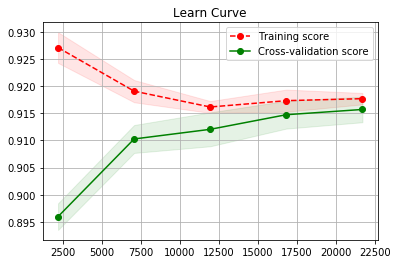

In [44]:
plot_learning_curve(model, xdata, ydata, cv=3, scoring='roc_auc')

### 验证曲线

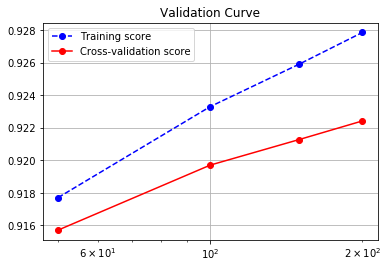

In [81]:
param_range = np.array([50,100,150,200])
train_scores, test_scores = validation_curve(model, xdata, ydata, cv=3, scoring="roc_auc",
                                             param_name="n_estimators", param_range=param_range,
                                             n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.semilogx(param_range, train_scores_mean,
             'o--', color="b", label="Training score")
plt.semilogx(param_range, test_scores_mean,
             'o-', color="r", label="Cross-validation score")
plt.grid()
plt.title('Validation Curve')
plt.legend(loc="best")
plt.show()

## 回归

In [105]:
xdata, ydata = get_dataset_boston()[1:3]
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.30, random_state=24) # 训练集&测试集

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [106]:
%%time
model = LinearRegression()
model.fit(X_train, y_train)  # 训练
y_pred = model.predict(X_test)  # 预测

CPU times: user 1.38 ms, sys: 467 µs, total: 1.85 ms
Wall time: 1.8 ms


### 回归评估指标

In [107]:
metrics_Regression(model, X_test, y_test, y_pred)

自带评分:0.7131356809501027
-------------------------
可释方差值:0.71815771177634
平均绝对误差:3.13340994561205
均方误差:20.685670700015486
中值绝对误差:2.406365778767622
R方值:0.7131356809501027


# 交叉验证

`cross_val_score(LogisticRegression(), xdata, ydata, cv=5, scoring='accuracy', n_jobs=-1)`

`scoring: accuracy, recall, f1, roc_auc`

* LogisticRegression()
* KNeighborsClassifier()
* SVC()
* MultinomialNB()
* DecisionTreeClassifier()
* RandomForestClassifier()
* GradientBoostingClassifier()
* AdaBoostClassifier()

In [3]:
xdata, ydata = get_dataset_adultTest()[1:3]

In [4]:
@count_time
def cv(model, X, y, cv, scoring):
    # scoring: accuracy, recall, f1, roc_auc
    score = cross_val_score(estimator=model, X=X, y=y, cv=cv, scoring=scoring, n_jobs=-1)
    print("%0.6f"%(np.mean(score)))
    return cv

In [5]:
cv(model=GradientBoostingClassifier(), 
   X=xdata, y=ydata,
   cv=4, scoring='roc_auc')

----------测试开始---------
0.921571
----------测试结束---------
总执行时间：9546.01毫秒ms
单执行时间：2386.50毫秒ms


# 网格搜索

GridSearchCV，它存在的意义就是自动调参，只要把参数输进去，就能给出最优化的结果和参数。但是这个方法适合于小数据集，一旦数据的量级上去了，很难得出结果。这个时候就是需要动脑筋了。数据量比较大的时候可以使用一个快速调优的方法——坐标下降。它其实是一种贪心算法：拿当前对模型影响最大的参数调优，直到最优化；再拿下一个影响最大的参数调优，如此下去，直到所有的参数调整完毕。这个方法的缺点就是可能会调到局部最优而不是全局最优，但是省时间省力，巨大的优势面前，还是试一试吧，后续可以再拿bagging再优化。回到sklearn里面的GridSearchCV，GridSearchCV用于系统地遍历多种参数组合，通过交叉验证确定最佳效果参数。

In [68]:
# 网格超参数搜索
model = GradientBoostingClassifier()
param = {
            'n_estimators':[400,500,600]
        }
grid = GridSearchCV(model, param_grid=param, cv=3, n_jobs=-1)
grid.fit(xdata, ydata)
grid.grid_scores_  # grid.best_params_  grid.best_score_   grid.get_params()

[mean: 0.87212, std: 0.00291, params: {'n_estimators': 400},
 mean: 0.87215, std: 0.00271, params: {'n_estimators': 500},
 mean: 0.87193, std: 0.00263, params: {'n_estimators': 600}]

In [75]:
# 预测评估
predict_test = grid.predict(xdata)
f1_score = metrics.f1_score(ydata,predict_test)
print(f"F1评分：{f1_score}")

F1评分为：0.7438567263640149


# 数据优化

In [99]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xdata.loc[:,('fnlwgt','capital-gain','capital-loss')] = \
ss.fit_transform(xdata.loc[:,('fnlwgt','capital-gain','capital-loss')])

In [100]:
%%time
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.30, random_state=24)
gsc = GradientBoostingClassifier(n_estimators=500)
gsc.fit(X_train, y_train)
predict_test = gsc.predict(X_test)
f1_score = metrics.f1_score(y_test,predict_test)
print(f"F1评分：{f1_score}")

F1评分：0.7099684258006316
CPU times: user 21 s, sys: 240 ms, total: 21.2 s
Wall time: 22.2 s
